In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
from scipy import optimize
from scipy.fft import fft, fftshift
import wavesim_functions as wave

In [2]:
depth = 100.
hs = 35.
# tp = 12. 

In [3]:
alpha = 0.7
om_p = 0.8
gamma = 3.3  # make larger to decrease width of Jonswap
r = 5.
phi_m = np.pi
beta = 4.
nu = 2.7
sig_l = 0.55  # make smaller to decrease directional spreading
sig_r = 0.26  # make zero to decrease directional spreading


In [4]:
om_num = 50
om_range = np.linspace(start=1e-3, stop=3, num=om_num)
f_range = om_range / 2*np.pi

phi_num = 100
phi_range = np.linspace(start=0, stop=2 * np.pi, num=phi_num)

x_num = 100
x_range = np.linspace(start=-50, stop=50, num=x_num)

y_num = 100
y_range = np.linspace(start=-50, stop=50, num=y_num)

d_om = om_range[1] - om_range[0]
d_phi = phi_range[1] - phi_range[0]


In [5]:
D_sprd = np.empty((phi_num, om_num))
for i_o, om in enumerate(om_range):
    for i_p, phi in enumerate(phi_range):
        D_sprd[i_p, i_o] = wave.sprd_fnc(om, phi, om_p, phi_m, beta, nu, sig_l, sig_r)

In [6]:
    jnswp_area = sum(d_om * jnswp_dns)
    jnswp_dns *= hs ** 2 / (16 * jnswp_area)  # rescale to provide given hs
    jnswp_area = sum(d_om * jnswp_dns)
jnswp_area

NameError: name 'tp' is not defined

In [ ]:
Dr_spctrm = np.empty((phi_num, om_num))
for i_o, om in enumerate(om_range):
    for i_p, phi in enumerate(phi_range):
        Dr_spctrm[i_p, i_o] = wave.frq_dr_spctrm(om, phi, alpha, om_p, gamma, r, phi_m, beta, nu, sig_l, sig_r)

In [ ]:
spctrm_vol = sum(sum(d_om * d_phi * Dr_spctrm))
Dr_spctrm *= hs ** 2 / (16 * spctrm_vol)  # rescale to provide given hs
spctrm_vol = sum(sum(d_om * d_phi * Dr_spctrm))
spctrm_vol

76.56249999999999

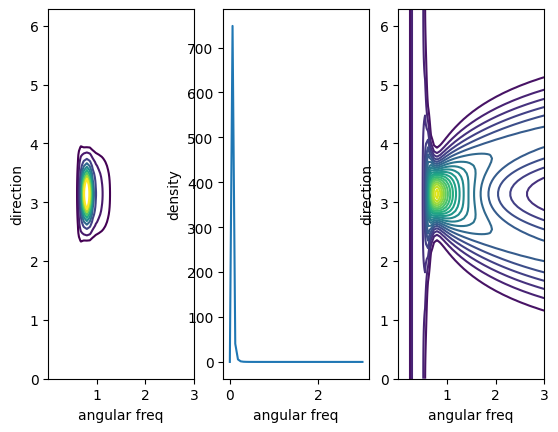

In [ ]:
omega_grid, phi_grid = np.meshgrid(om_range, phi_range)
plt.figure()

plt.subplot(1, 3, 1)
plt.contour(omega_grid, phi_grid, Dr_spctrm, levels=[15, 30, 60, 90, 120, 150, 180, 210, 240])
plt.xlabel("angular freq")
plt.ylabel("direction")

plt.subplot(1, 3, 2)
plt.plot(om_range, jnswp_dens)
plt.xlabel("angular freq")
plt.ylabel("density")

plt.subplot(1, 3, 3)
plt.contour(omega_grid, phi_grid, D_sprd, levels=20)
plt.xlabel("angular freq")
plt.ylabel("direction")

plt.show()

In [8]:
nt = 100
trange = np.linspace(0, 15, nt)
names = []
x_grid, y_grid = np.meshgrid(x_range, y_range)  # expand x and y axis onto a grid to plot eta over

In [9]:
for it, t in enumerate(trange):

    eta = wave.spatial_random_wave(om_range=om_range, phi_range=phi_range, Dr_spctrm=Dr_spctrm, t=t, x_range=x_range, y_range=y_range, h=depth)

    print(np.var(eta))

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    surf = ax.plot_surface(x_grid, y_grid, eta)

    ax.set_zlim(-40, 40)

    name = f'time_{it}.png'
    names.append(name)

    plt.savefig(name)
    plt.close()


NameError: name 'Dr_spctrm' is not defined

In [ ]:
with imageio.get_writer('random-waves-moving.gif', mode='I') as writer:
    for filename in names:
        image = imageio.imread(filename)
        writer.append_data(image)

In [ ]:

for name in set(names):
    os.remove(name)